# GEOG 250 - Lab 2: Matplotlib, Pyplot, and Gridded Data
This lab will expand your Python horizons by introducing you to `Matplotlib`, the basic plotting/graphing library of Python.

`Matplotlib` allows you to generate endlessly customizable plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.

`matplotlib.pyplot` is a module in Matplotlib that provides a collection of functions for creating and customizing plots. Each `pyplot` function performs a specific action, such as creating a figure, adding a plotting area (axes), plotting data, or decorating the plot with labels, titles, and legends.

In `matplotlib.pyplot`, the concept of "axes" is important to understand:

- **Figure**: The overall container or "frame" for your plot, which can hold one or more plotting areas.
- **Axes**: The individual plotting areas within a figure. Note that in Matplotlib, "axes" refers to the entire plotting area (including the data and the x/y-axis), not just the mathematical definition of multiple axis lines.

Each figure can contain multiple axes (e.g., using `add_subplot()`), and each axes can have its own set of data series plotted along shared or independent x- and y-axes. Everything added to a specific axes (e.g., data points, gridlines, labels) is plotted relative to its associated axis.

By keeping track of the current figure and axes, `matplotlib.pyplot` ensures that the plotting commands in your code are applied to the correct location.


References (and other examples): 
- https://matplotlib.org/users/pyplot_tutorial.html
- https://nbviewer.jupyter.org/github/matplotlib/AnatomyOfMatplotlib/tree/master/
- https://matplotlib.org/stable/tutorials/images.html


We will simultaneously be learning how to manipulate imported data for purposes of plotting and analysis.

## Pre-lab review: Importing Packages
Before we begin, let's take a moment to review package import syntax. By now you have likely noticed that there are different ways to import packages. Lets look at some examples:

In [10]:
# The most basic form of import is to simply import the package (also referred to as a library):
import numpy
numpy.pi

3.141592653589793

In [11]:
# We can also rename the library for easier typing:
import numpy as np
np.pi

3.141592653589793

In [12]:
# Or import only a specific function/constant from the library:
from numpy import pi
pi

3.141592653589793

### Semantic clarification: constants versus functions
`np.pi` is a constant, not a function. It represents the mathematical constant π (pi).

In Python, constants like `np.pi` are fixed values defined in libraries for convenience and accuracy. Here's how it breaks down:

- **Constants:** Values that don't change (e.g., `numpy.pi`, `numpy.e` for Euler's number).
- **Functions:** Perform operations or calculations when called (e.g., `numpy.sin()` or `numpy.mean()`).

In [13]:
# Constants v. Functions example:

import numpy as np

# np.pi is a constant
print(np.pi)

# np.sin() is a function that uses the constant np.pi as input
print(np.sin(np.pi))

3.141592653589793
1.2246467991473532e-16


In [14]:
# Using an asterisk (*) will import all functions and constants from the library. 
# This allows you to use them directly without prefixing them with the library (e.g., 'numpy') name:
from numpy import *
pi

3.141592653589793

In [15]:
# You can also rename a specific function or constant from the library using the 'as' keyword:
from numpy import pi as pie
pie

3.141592653589793

In [16]:
# Importance on the order of imports:

from numpy import pi
from math import pi
pi # Which library's pi is this?

3.141592653589793

In this case, the pi that is available depends on the order of the imports. 

Python uses the last imported version of pi because it overwrites the previous one in the namespace.

In [17]:
from numpy import pi  # This imports np.pi
from math import pi   # This imports math.pi and overwrites the previous pi

print(pi)  # Refers to math.pi

3.141592653589793


### Submodules
In the context of a library, a **submodule** is a smaller module or component that is part of a larger package (the library). It is essentially a specific functionality or feature set within the library that can be imported and used separately from the rest of the library. Submodules must be imported separately.

In Python, importing a package like `matplotlib` does not automatically import its submodules (such as `matplotlib.pyplot`). You must import the submodule explicitly to use its functions.

In [18]:
import matplotlib
# matplotlib.pyplot.plot()  # This will raise an AttributeError because 'pyplot' isn't imported.

In [19]:
import matplotlib.pyplot  # Importing the submodule correctly

For better readability, it’s common to use the as keyword to create an alias for the submodule. This shortens the code and makes it easier to type:

[]

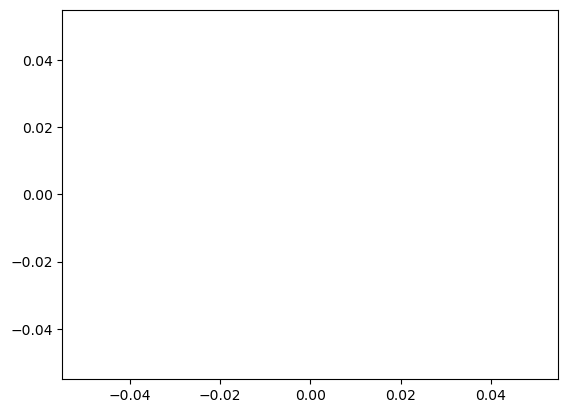

In [20]:
import matplotlib.pyplot as plt  # Creating an alias for the submodule
plt.plot()  # This is equivalent to matplotlib.pyplot.plot()

## Getting started with Matplotlib

In [2]:
# PREAMBLE:
# Import the packages used in this lab.
# The magic function (%matplotlib inline) will make plotting commands appear in each notebook cell.
# If you don't use the magic function, you have to call plt.show() to see the output of your plotting commands.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rasterio as rio

%matplotlib inline

### Figures
In Matplotlib, data is plotted on a `figure`, which contains one or more `axes`. Each axis corresponds to a specific set of data that will be visualized (e.g., the x and y axes of a plot). The simplest way to create an empty figure is by using the `plt.figure()` function. Data can then be plotted on the current axes using `plt.plot()`.

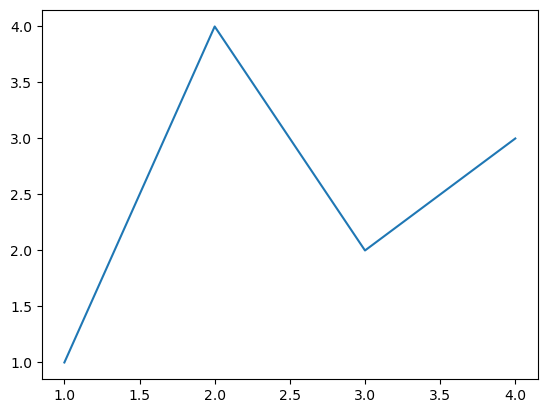

In [22]:
# Create an empty figure with axes
plt.figure()

# Create example data
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

# Plot the data on the current axes (the one created by plt.figure())
plt.plot(x, y)


#### Basic customization 

**Figure size:**

You can adjust the size of a **figure** in Matplotlib by specifying the `figsize` argument when calling `plt.figure()`. The `figsize` argument takes a tuple of two values: `(width, height)`, where both values are measured in inches. The default size for a figure is 6 inches by 4 inches.

**Markers:**

Markers represent the individual data points. Some markers include:

- `^` will display a triangle marker
- `*` will display a star marker
- `H` will display a hexagon marker

**Line Styles:**

You can also specify the line styles:

- `'-'` for a solid line
- `'--'` for a dashed line
- `':'` for a dotted line
- `'-.'` for a dash-dot line

**Connecting Lines with Markers:**

You can combine line styles and markers to create more customized plots. 

To do this, simply include both a line style and a marker in the `plt.plot()` function.

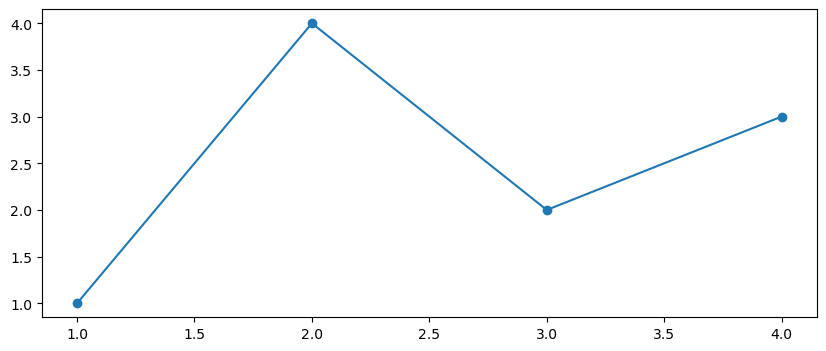

In [23]:
# Create a figure with specified size
plt.figure(figsize=(10, 4))

# Plot data with circular markers connected by solid lines
plt.plot(x, y, '-o')

#### Plotting Multiple Series on the Same Plot

Matplotlib allows you to plot multiple series on the same plot by calling `plt.plot()` multiple times. Each call to `plt.plot()` will plot a new series, and all the series will share the same axes by default.

*When you first call `plt.plot()`, a default figure is created automatically. You only need `plt.figure()` if you need a separate figure or want to control figure dimensions and other settings.*


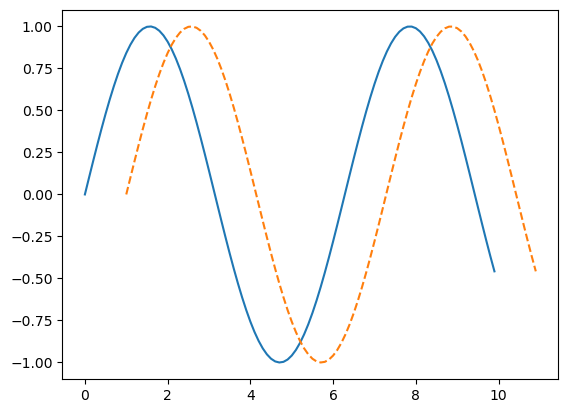

In [24]:
# Make some data
x = np.arange(0, 10, 0.1)  # review: what function is used here, and what does this do?
y = np.sin(x)              # review: what package/function are we accessing? What argument is passed?

# Plot the first series (x vs y)
plt.plot(x, y)

# Shift the data by 1 and plot the second series (x+1 vs y)
plt.plot(x+1, y, '--')

#### Creating Subplots

`plt.subplots()` is used to create multiple axes (subplots) within a single figure. It returns a figure (`fig`) and an array of axes (`ax`), where you can plot each dataset on a different axis.

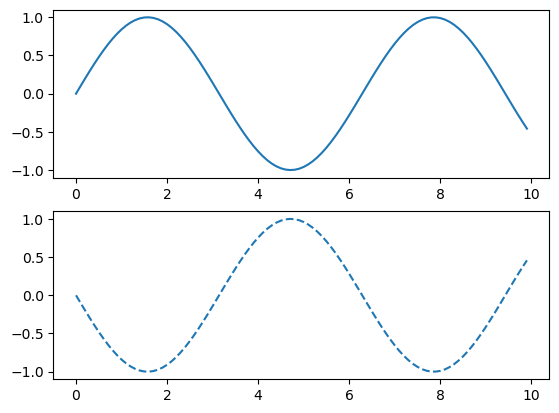

In [15]:
# Make some data
x = np.arange(0, 10, 0.1)
y = np.sin(x)

# Create figure and axes instances using the plt.subplots() command
fig, ax = plt.subplots(2)

# Plot data on the first subplot (axes[0])
ax[0].plot(x, y)

# Plot shifted data on the second subplot (axes[1])
ax[1].plot(x, -y, '--')

#### More plot customatization

Once a plot is created, you can further customize various aspects of the plot, such as axis labels, titles, legends, and more. These customizations are applied to the *current* axes. 

- **Line Style and Color**: You can change the color, thickness, and style of the line in the plot.
- **Scatter Plot**: You can switch to a scatter plot by removing the line and plotting only the points.
- **Axis Limits**: The limits of the x-axis and y-axis can be manually set using `plt.xlim()` and `plt.ylim()`.
- **Adding Legends**: To add a legend, label the lines in the plot command and use `plt.legend()`.

Let's incorporate all these features in the next example:

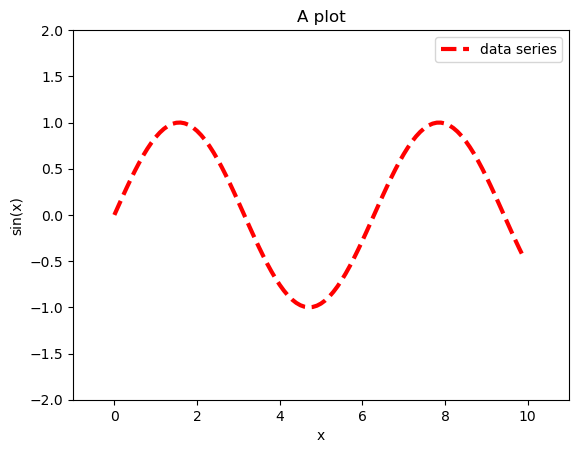

In [16]:
# Plot data with customizations
plt.plot(x, y, '--', linewidth=3, color='red', label='data series')

# Set axis labels
plt.xlabel('x')
plt.ylabel('sin(x)')

# Set plot title
plt.title('A plot')

# Set the limits of the x-axis
plt.xlim((-1, 11)) # (min, max)

# Set the limits of the y-axis
plt.ylim((-2, 2)) # (min, max)

# Add a legend
plt.legend()

**Exercise 1:** Create a variable `new_y` with the same length as `x`, that is made of random numbers (use the `np.random.randn` function). Plot x and new_y and specify color, line style, labels, and title. Put the legend in the lower right corner of the figure.  

### Axes

Axes are created automatically when you plot data. However, you can also explicitly define axes, and then direct your plotting commands to specific axes. This allows for more control over where and how your data is plotted.

The `set` command is used to customize the axes by adding labels, titles, and setting the axis limits (`xlim` and `ylim`).

For example, after creating a figure and its axes, you can set various properties of the axes individually, such as axis labels, the plot title, and limits for both axes.


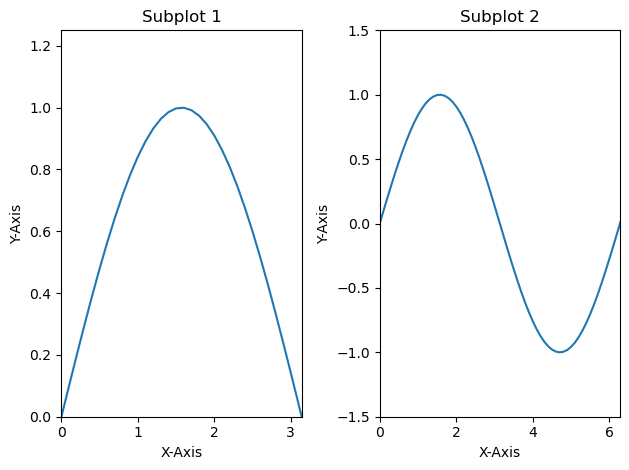

In [17]:
# Create a figure
fig = plt.figure()

# First subplot (1 row, 2 columns, 1st subplot)
ax1 = fig.add_subplot(1,2,1)
ax1.set(xlim=[0, np.pi], 
        ylim=[0, 1.25], 
        title='Subplot 1',
        ylabel='Y-Axis', 
        xlabel='X-Axis')

# Second subplot (1 row, 2 columns, 2nd subplot)
ax2 = fig.add_subplot(122)  # Alternative syntax; what changed from ax1?
ax2.set(xlim=[0, np.pi*2], 
        ylim=[-1.5, 1.5], 
        title='Subplot 2',
        ylabel='Y-Axis', 
        xlabel='X-Axis')

# Use plt.tight_layout() for smart spacing
plt.tight_layout()  # This automatically adjusts subplot spacing

# Plot data on the first subplot
ax1.plot(x, y)

# Plot data on the second subplot
ax2.plot(x, y)

# You can add more series to each axis, for example:
# ax2.plot(x + 1, y)  # This will plot a shifted version of the data


### Basic Plot Types

#### Data Series
You can use `plt.plot` for simple line plots, or `plt.scatter` for scatter plots that typically show correlations between variables. 

In scatter plots, you can also use color to represent a third variable.

Text(0, 0.5, 'y')

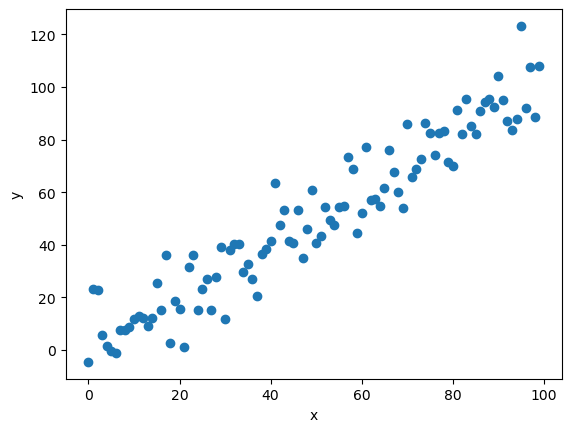

In [18]:
x = np.arange(100)  # Creates an array of 100 values from 0 to 99 (np.arange returns an ndarray)
y = x + np.random.randn(100)*10  # Adds random noise to the data
plt.figure()
plt.scatter(x, y)  # Create a scatter plot of x vs y
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

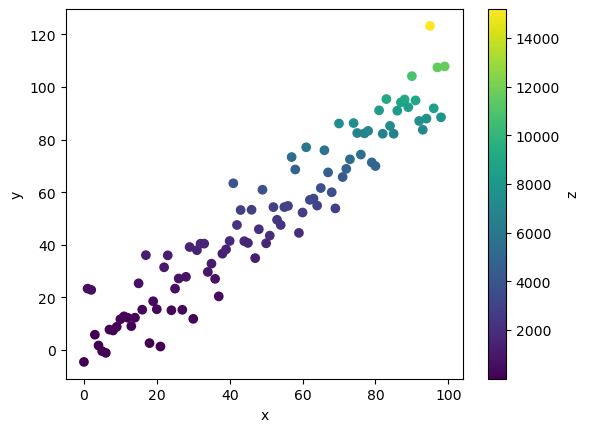

In [24]:
# Create a new variable z as the square of y
z = y**2
plt.figure()

# Create a scatter plot with color based on the values of z
plt.scatter(x, y, c=z)

# Add a colorbar to the plot
cb = plt.colorbar() 

# Label the colorbar
cb.set_label('z')

# Add axis labels
plt.xlabel('x')
plt.ylabel('y')



**Exercise 2:** `plt.scatter` can also accept a fourth variable that controls the size of the markers. To explore this feature, search the help documentation for `plt.scatter` to learn how to scale marker sizes based on a variable. Create a new variable `size` (with the same length as x, y, and z) and add it to a new scatter plot.

#### Barplots

Barplots are commonly used to visualize *categorical* data, such as counts or frequencies for different categories. In Matplotlib, you can create a bar plot using the `plt.bar()` function. This function requires two arguments:
- The position of the bars (usually on the x-axis)
- The height of the bars (usually the y-values)

Below is an example of creating a simple bar plot showing the usage of different programming languages:


Text(0.5, 1.0, 'Programming Language Usage')

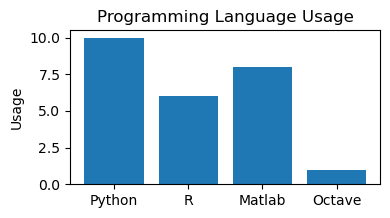

In [54]:
# Create data
languages = ('Python', 'R', 'Matlab', 'Octave')  # A list of programming languages
usage = [10, 6, 8, 1]                            # Data to be plotted (usage counts)

# Create figure and axis
plt.figure(figsize=[4, 2])  # Specify the figure size
ax = plt.subplot(111)       # Create a single subplot

# Create an array that contains the tick positions
x_pos = np.arange(len(languages))  # Positions of the bars along the x-axis

# Create the bar plot
plt.bar(x_pos, usage) # Call the bar plot with positions (x_pos) and heights (usage)

# Add tick names at the specified positions
plt.xticks(x_pos, languages) # Add x-axis labels with the language names

# Customize the plot with labels and a title
plt.ylabel('Usage')                      # Label for the y-axis
plt.title('Programming Language Usage')  # Title of the plot


**Exercise 3:** Change the barplot code to plot gray bars. 

**Exercise 4**: Search the help for `plt.bar` for how to make horizontal barplots, and modify your code to show a horizontal barplot of language usage. 

#### Histograms

Histograms `plt.hist()` are used to visualize the distribution of a dataset by dividing the data into intervals, or bins. Each bin shows the number of data points that fall into that range. Histograms are especially useful when working with large datasets to quickly understand the data's shape.

In [76]:
# Assign mean and standard deviation for synthetic data
mu, sigma = 100, 15   

# Create synthetic data set with a mean of 100
x = mu + sigma * np.random.randn(10000)
x

array([100.17131907,  91.17719939,  78.34487552, ..., 124.8905379 ,
        88.55144396,  85.87165759])

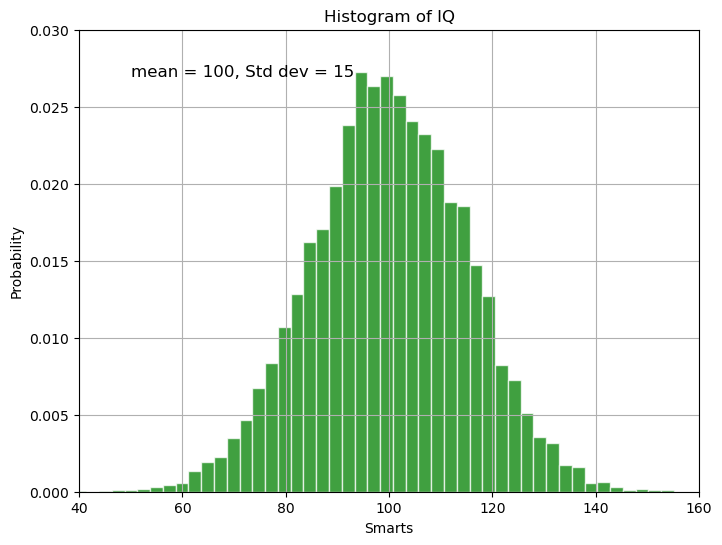

In [77]:
# Plot histogram of the data
plt.figure(figsize=(8, 6))
plt.hist(x, bins=50, 
         density=True, # Normalizes the histogram such that the area under the histogram sums to 1, converting it into a probability density.
         facecolor='g', # Colour of the bars (green)
         edgecolor='white', # Colour of bar borders
         alpha=0.75) # Adjusts transparency; alpha = 1 is opaque

# Customize labels and title
plt.xlabel('Smarts')  # X-axis label
plt.ylabel('Probability')  # Y-axis label
plt.title('Histogram of IQ')  # Title of the plot

# Customize x and y limits for better data representation
plt.xlim(40, 160)  # Set limits for the x-axis
plt.ylim(0, 0.03)  # Set limits for the y-axis

# Add text annotation to the figure using x, y data coordinates
plt.text(50, 0.027, 'mean = 100, Std dev = 15', fontsize=12, color='black')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()


**Exercise 5:** Copy and paste the histogram code into the cell below, but change the `facecolor`, `edgecolor`, and transparency (`alpha`) of the histogram, and move the text to the right side of the figure. 

#### Boxplots

Boxplots `plt.boxplot()` are a convenient way to summarize the distribution of data. They show key statistical measures, including:

- **Median (50th percentile)**: The middle value of the dataset, dividing it into two halves.
- **First quartile (25th percentile)**: The value below which 25% of the data fall.
- **Third quartile (75th percentile)**: The value below which 75% of the data fall.
- **Whiskers**: The lines extending from the box, representing the range of data within a defined limit (typically 1.5 times the interquartile range, or IQR, from the quartiles).
- **Outliers**: Data points that fall outside the whiskers, indicating unusual or extreme values in the dataset.

Boxplots are useful for comparing the distribution of multiple datasets side by side, spotting outliers, and observing the spread and skewness of the data.


In this example, we will import sample data that uses both `pandas` and `matplotlib` in tandem to create the boxplot. Here’s how the two libraries complement each other:

1. **`pandas` for Data Handling**: 
   - The `pandas` library is used to efficiently handle and manipulate the csv data.
   - Once the data is loaded into a `DataFrame`, we use `pandas`' built-in `boxplot()` function. This function simplifies the plotting process by automatically grouping the data by the `'Position'` column and creating a boxplot of `'Age'` values.
   
2. **`matplotlib` for Plot Customization**:
   - `matplotlib` is used to handle the plot’s customization.


<class 'pandas.core.frame.DataFrame'>


<Figure size 800x600 with 0 Axes>

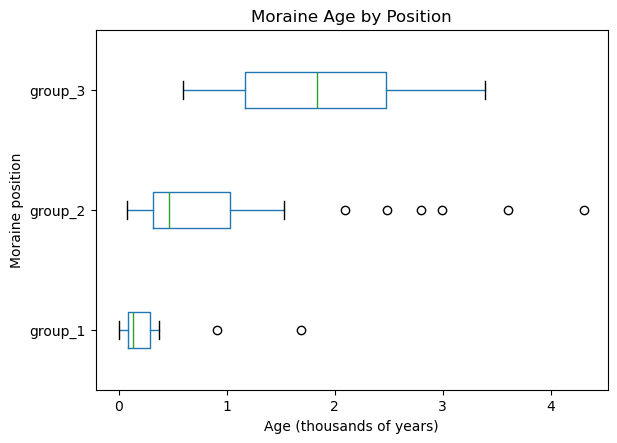

In [1]:
import pandas as pd
# import matplotlib.pyplot as plt  ## left here in case you want to run this cell independently

# Import the CSV data
data = pd.read_csv('moraine_age_and_position.csv')
print(type(data))

# Create the boxplot by grouping data by 'Position' and using 'Age' for column
plt.figure(figsize=(8, 6))
data.boxplot(column='Age', by='Position', vert=False)

# Customize the plot
plt.title('Moraine Age by Position')
plt.suptitle('')  # Remove the default 'Boxplot' title added by pandas
plt.xlabel('Age (thousands of years)')
plt.ylabel('Moraine position')
plt.grid(False)

### Plotting Gridded Data

We will be working with gridded geospatial data for much of this course, so here is a primer using a simple digital image: its a photo taken during summer field work, rescaled to make it smaller and easier to work with. A digital image like this is simply a grid of data, and each pixel is assigned an intensity value for Red, Green, and Blue (RGB):

<img src='DSC_6121.jpg'>

The `Matplotlib.image` function can import .jpg files into Python. Other file types that have geospatial information attached (e.g. Geotiffs) require additional packages for importing, and we will get to those later.

Below, the `imread` function puts the image data into a numpy array. To plot it, we use the Matplotlib function `imshow`:

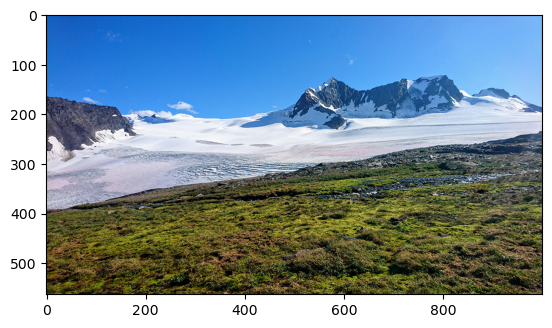

In [2]:
## libraries needed for the work below, in case just running this section of lab
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import rasterio as rio

# import the photo from your lab data folder:
jpg = mpimg.imread('DSC_6121.JPG')   

# use plt.imshow
imgplot = plt.imshow(jpg)

Like all digital photographs, this one has three bands: one for Red, Green, and Blue. The image is represented in python as a series of *arrays* (gridded data). We can check the shape of the image data using the `shape` function, and the datatype using the `type` function:

In [3]:
# what is the shape of this array?
print(jpg.shape)

(563, 1000, 3)


 The data used to create the image has 563 rows, and 1000 columns and three bands - each element is an unsigned 8-bit integer, so the values go from 0 to 255. Lets use indexing to take a small sample (5x5) of the first band:

In [4]:
# index a subset of the data from the first band
jpg[0:5,0:5,0]  

array([[18, 17, 20, 22, 19],
       [ 7, 18, 24, 24, 27],
       [15, 23, 11,  5, 20],
       [22, 17, 12,  9, 10],
       [27, 15, 11, 12, 13]], dtype=uint8)

Now lets look at the RGB values for a single pixel (0,0): 

In [5]:
# RGB triplet - three values for a single pixel
jpg[0,0,:]

# what is the datatype?

array([ 18,  93, 186], dtype=uint8)

Matplotlib is treating each pixel of the image as an RGB triplet. To make a pseudo-colour plot, we can extract one *slice* of the RGB values for the entire image using array indexing. 

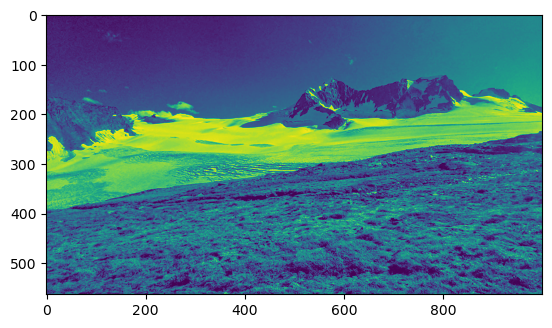

In [6]:
jpg_0 = jpg[:, :, 0] # what does this indexing do?

plt.imshow(jpg_0)

The default colormap (used above) is called 'viridis'. The colormap can be specified using `plt.imshow()` (or any of the other array plot commands) using the `cmap` flag, and the `plt.colorbar()` function adds a colorbar to your plot. 

A note about `imshow`: The first element of an array is found at position (0, 0). By default, `imshow` flips the array to show the origin (0, 0) in the top left (upper) corner. You can change this by adding the flag `origin = 'lower'` to your imshow command.

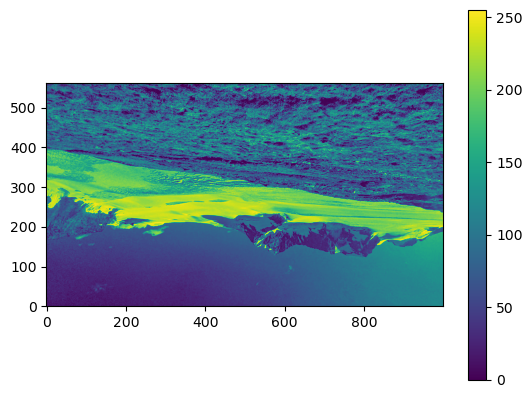

In [7]:
plt.imshow(jpg_0, origin = 'lower')
plt.colorbar()

We can also plot a histogram of the data stored in the array. Since the image is stored as a 2-D array (rows and columns), we need to transform it into a 1-D array to make it suitable for plotting. This process is called *flattening*, and we can achieve it using the `np.ravel` function:

In [11]:
print(jpg_0.shape)            # Check the shape of the image array

jpg_0_flat = np.ravel(jpg_0)  # Flatten the 2-D array into a 1-D array

print(len(jpg_0_flat))        # Check the length of the flattened array. What happened?
# We now see that the pixel values, which were originally arranged in rows and columns, are now all laid out in a single long row (i.e., 1-Dimension)

(563, 1000)
563000


Next, we create the histogram using the `plt.hist()` function, which visualizes the distribution of the pixel values in the flattened array. You can observe the difference if you try to directly plot the 2-D array instead.

In [12]:
plt.hist(jpg_0_flat, bins=256)  # Plot the histogram with 256 bins to match 8-bit pixel values
plt.xlabel('Digital Number')  # Label the x-axis
plt.ylabel('Count')           # Label the y-axis

Text(38.097222222222214, 0.5, 'Count')

Looking at the histogram, we can change the **limits** to stretch the image, or improve the contrast. 

### Explanation of Terms

| Term        | Description                                                                                      | Example Usage                                     |
|-------------|--------------------------------------------------------------------------------------------------|---------------------------------------------------|
| **`clim`**  | A method for setting the color limits directly on `imshow()`. Defines the min and max values for mapping image data to colors. | `plt.imshow(jpg_0, cmap='gray', clim=(20, 100))`  |
| **`vmin`**  | Sets the minimum value for the color scale. Values below this are mapped to the lowest color in the colormap. | `plt.imshow(jpg_0, cmap='gray', vmin=10)`         |
| **`vmax`**  | Sets the maximum value for the color scale. Values above this are mapped to the highest color in the colormap. | `plt.imshow(jpg_0, cmap='gray', vmax=100)`        |
| **`cmap`**  | Defines the colormap for visualizing the image data. Common examples include `'gray'`, `'viridis'`, `'inferno'`, etc. | `plt.imshow(jpg_0, cmap='gray')`                  |
| **`colorbar()`** | Adds a colorbar to the image, indicating the mapping of data values to colors. | `plt.colorbar()`                                  |


Text(0, 0.5, 'Y')

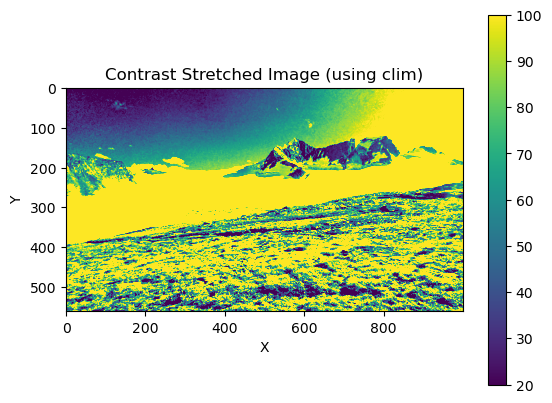

In [137]:
# Method 1: Using clim to set color limits
plt.imshow(jpg_0, cmap='viridis', clim=(20, 100))  # Adjust color limits to stretch the contrast
plt.colorbar()
plt.title('Contrast Stretched Image (using clim)')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

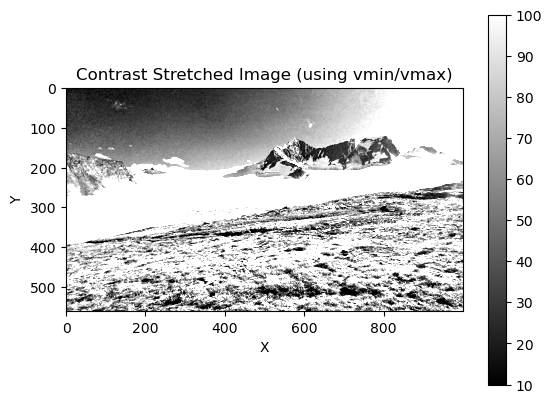

In [134]:
# Method 2: Using vmin and vmax
plt.imshow(jpg_0, cmap='gray', vmin=10, vmax=100)  # Set minimum and maximum pixel values
plt.colorbar()
plt.title('Contrast Stretched Image (using vmin/vmax)')
plt.xlabel('X')
plt.ylabel('Y')

## Colormaps and Saving Your Figures
The default colormap in Matplotlib is called 'viridis': it ranges from yellows to greens to blues. To change to colormap of a plot, use the `cmap` flag in the `imshow` command, and specify the name of the color palette you want to use. A range of default palettes can be seen here: https://matplotlib.org/users/colormaps.html

To save your figures, use the `plt.savefig` function. You specify the filepath and filename, the resolution, and a range of other options. Matplotlib can export .jpeg, .png, .pdf, .tif, etc. 




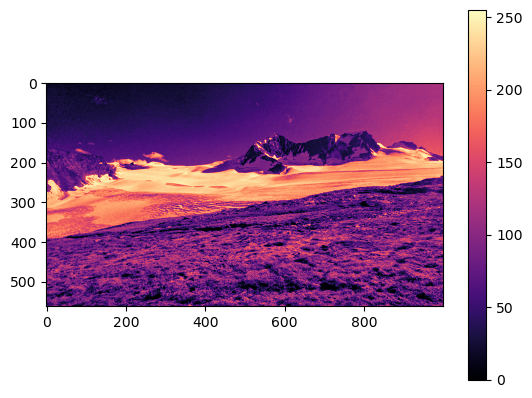

In [147]:
plt.figure()
plt.imshow(jpg_0, cmap='magma')
plt.colorbar()
plt.savefig(fname = 'jpg_0-magma.png', dpi=150)

As a final example of working with gridded data, we will use a file containing gridded elevation data from the **Shuttle Radar Topography Mission (SRTM)**. SRTM is a NASA program that produced global *tiles* of digital elevation data, covering nearly the entire planet.


Array shape: (6001, 6001)
Elevation at (6000, 6000): -32768


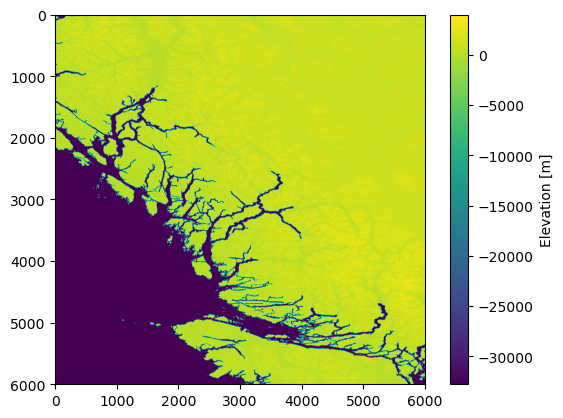

In [12]:
srtm = rio.open('srtm_11_02.tif') # Use rasterio to open the .tif file
z = srtm.read(1) # Read the first band of the raster as a np array

# Print the shape of the array and an example elevation value
print("Array shape:", z.shape)
print("Elevation at (6000, 6000):", z[6000, 6000])
plt.imshow(z, cmap='viridis')
plt.colorbar(label='Elevation [m]')

When we first look at the data, the ocean values are set to `-32678`. Why this number?

This is a flag indicating *null values* rather than actual elevation. This specific number is likely chosen because it is an uncommon value for real-world elevation and stands out as a placeholder. 

To visualize the data more effectively, we can mask these null values by rescaling the image:

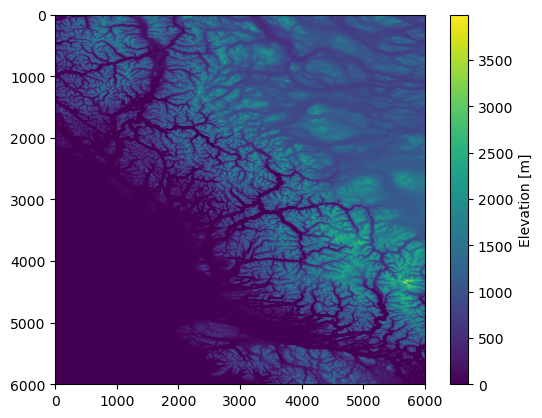

In [13]:
plt.imshow(z, vmin=0, cmap='viridis') # This sets the minimum value for the color scale to 0 meters, improving contrast by ignoring extremely low flagged values.
plt.colorbar(label='Elevation [m]')  # label your colorbar and give it units

# End of Lab 2